# Plotting in Python with matplotlib
Shahryar Noei
Based on notebooks designed by Marco Chierici

Apr 2, 2025

# Common Jupyter notebook shortcuts

- Execute current cell (and advance to the next one): SHIFT + ENTER
- Execute current cell (and stay there): CTRL (CMD) + ENTER
- Create an empty code cell above the selected cell: ESC + A
- Create an empty code cell below the selected cell: ESC + B
- Delete selected cell: ESC + DD (not a typo: two times D)
- Copy selected cell: ESC + C
- Paste selected cell below: ESC + V
- Change selected cell type from code to text (markdown): ESC + M
- Change selected cell type from text to code: ESC + Y

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Colors, line widths, line types

We have already seen that we can define markers, colors, and line types with a `format` string such as `og-.` (green circles with dash-dot line).

You can also set these properties separately using appropriate keywork arguments inside `plot`.

## Colors

Define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

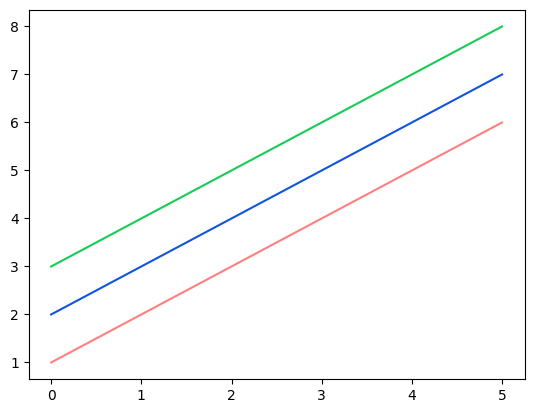

In [2]:
fig, ax = plt.subplots()

x = np.linspace(0, 5, 10)

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd") # bluish color
ax.plot(x, x+3, color="#15cc55") # greenish color
plt.show()

Matplotlib also comes with **pre-built colors and palettes**. Type the following in your jupyter/python console to check out the available colors.

```
mpl.colors.CSS4_COLORS  # 148 colors

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 ...
```

```
mpl.colors.XKCD_COLORS  # 949 colors

{'xkcd:cloudy blue': '#acc2d9',
 'xkcd:dark pastel green': '#56ae57',
 'xkcd:dust': '#b2996e',
 'xkcd:electric lime': '#a8ff04',
 'xkcd:fresh green': '#69d84f',
 'xkcd:light eggplant': '#894585',
 'xkcd:nasty green': '#70b23f',
 'xkcd:really light blue': '#d4ffff',
 'xkcd:tea': '#65ab7c',
 'xkcd:warm purple': '#952e8f',
 ...
```

```
mpl.colors.BASE_COLORS  # 8 colors

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}
```

In [3]:
# View first 10 Palettes
dir(plt.cm)[:10]

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r']

For more information and examples on Matplotlib's color palettes, have a look at the [official documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

## Line and marker styles

To change the line width, we can use the `linewidth` (or `lw`) keyword argument. The line style can be selected using the `linestyle` (or `ls`) keyword arguments:

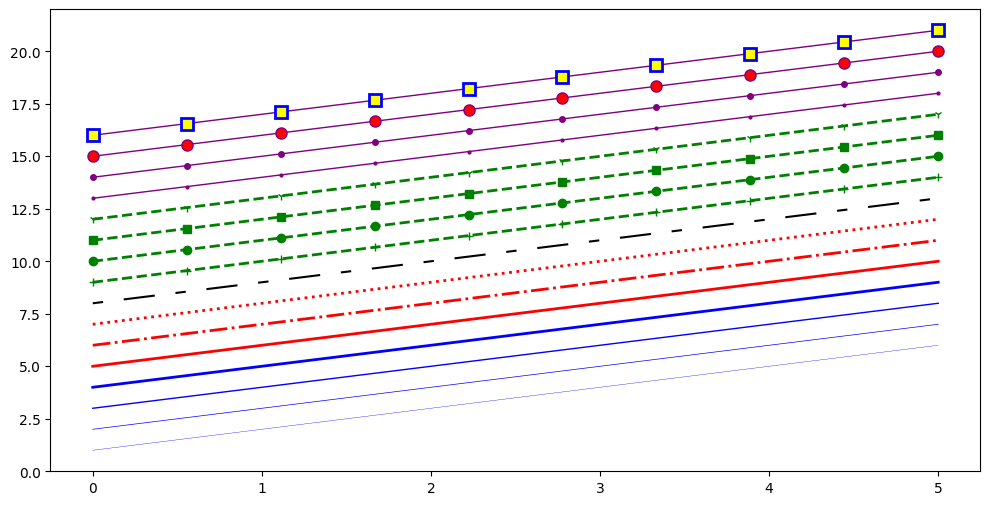

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue")

plt.show()

# Axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

## Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges (i.e., just large enough to show all data).

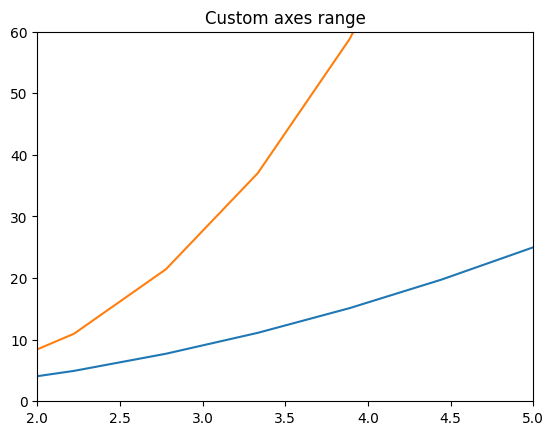

In [5]:
fig, ax = plt.subplots()

ax.plot(x, x**2, x, x**3) # note how you can also provide several x-y pairs
ax.set_xlim([2, 5])
ax.set_ylim([0, 60])
ax.set_title("Custom axes range")
plt.show()

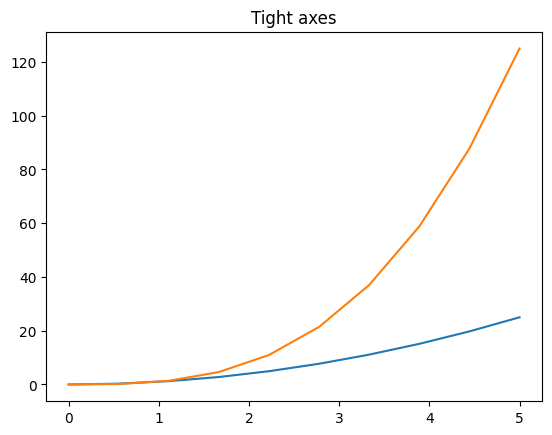

In [6]:
fig, ax = plt.subplots()

ax.plot(x, x**2, x, x**3)
ax.axis("tight")
ax.set_title("Tight axes")
plt.show()

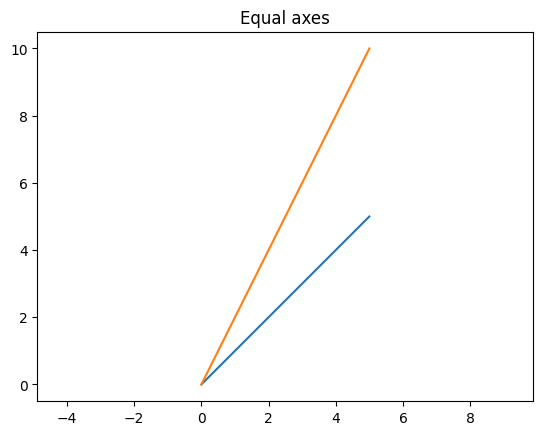

In [7]:
fig, ax = plt.subplots()

ax.plot(x, x, x, 2*x)
ax.axis("equal")
ax.set_title("Equal axes")
plt.show()

## Logarithmic scale

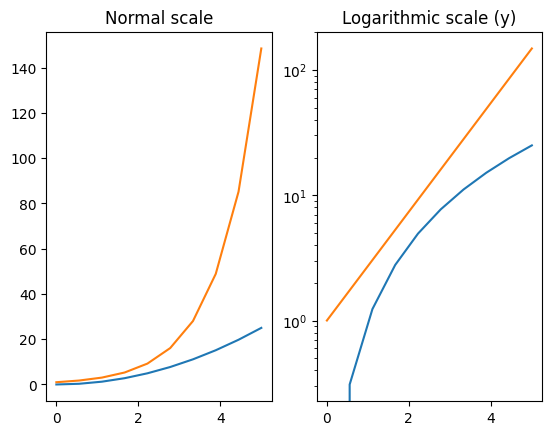

In [8]:
fig, axes = plt.subplots(1, 2)
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")

plt.show()

## Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

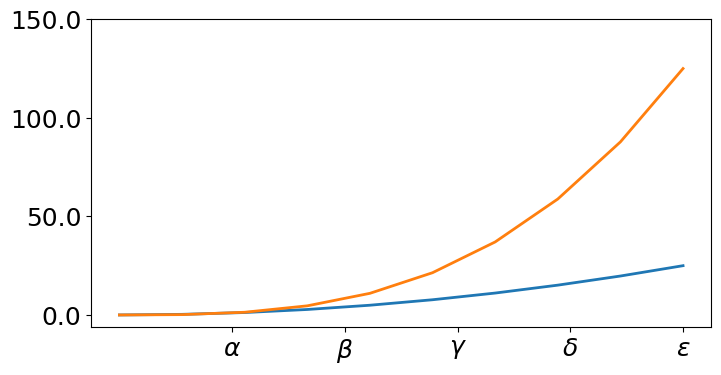

In [9]:
x = np.linspace(0, 5, 10)

xticks = [1, 2, 3, 4, 5]
custom_xticklabels = [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$']

yticks = [0, 50, 100, 150]
custom_yticklabels = [f"{y:.1f}" for y in yticks]

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, x**2, x, x**3, lw=2)
ax.set_xticks(xticks)
ax.set_xticklabels(custom_xticklabels, fontsize=18)
ax.set_yticks(yticks)
ax.set_yticklabels(custom_yticklabels, fontsize=18)

plt.show()

## Scientific notation

With large numbers on x or y axis, it is often better use scientific notation: to this end, with an Axes `ax` object we use `ax.xaxis.set_major_formatter(formatter)` (`ax.yaxis.set_major_formatter(formatter)`) with a Formatter object.

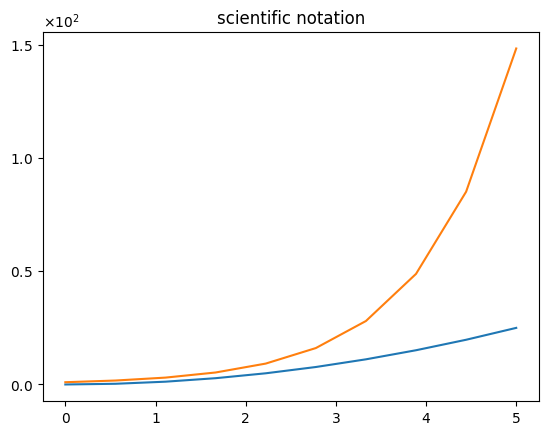

In [10]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks(yticks)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1, 1)) # (min_exp, max_exp)
ax.yaxis.set_major_formatter(formatter) 

plt.show()

---

# How to Modify the Axis Ticks Positions and Labels

There are 3 basic things you will probably ever need in matplotlib when it comes to manipulating axis ticks:

* How to control the position and tick labels (using `plt.xticks()` or `ax.setxticks()` and `ax.setxticklabels()` - similarly for the y axis)
* How to control which axis ticks (top/bottom/left/right) should be displayed (using `plt.tick_params()`)
* Functional formatting of tick labels.

If you are using the OO interface (`ax`), you can use `ax.set_xticks()` and `ax.set_xticklabels()` to set the positions and label texts respectively. If you are using the Matlab-like interface (`plt`), you can set both the positions as well as the label text in one call using the `plt.xticks()`.

Actually, if you look at the code of `plt.xticks()` method (type `??plt.xticks` within a Jupyter notebook), it calls `ax.set_xticks()` and `ax.set_xticklabels()` to do the job. 

`plt.xticks` takes the ticks and labels as required parameters but you can also adjust the label fontsize, rotation, `horizontalalignment` and `verticalalignment` of the hinge points on the labels.

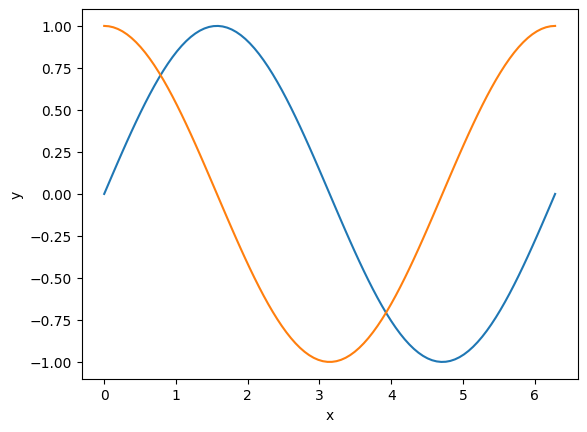

In [11]:
X = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.plot(X, np.sin(X))
plt.plot(X, np.cos(X))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The `matplotlib.ticker` module provides the `FuncFormatter` to determine how the final tick label should be shown: let's use it to display x as degrees instead of radians.

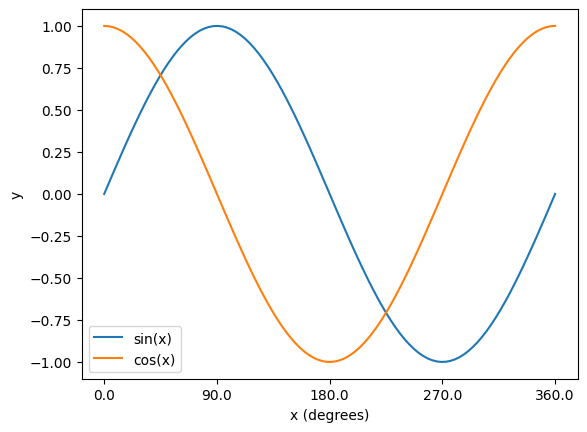

In [12]:
X = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.plot(X, np.sin(X))
plt.plot(X, np.cos(X))
plt.xlabel("x (degrees)")
plt.ylabel("y")

# desired result: x ticks at 0, pi/2, pi, 3*pi/2, 2*pi radians
rad_deg = 180 / np.pi # radians to degrees conversion factor (since pi rad = 180 deg)
plt.xticks(ticks=np.arange(0, 370/rad_deg, 90/rad_deg)) # 370 to add a little margin
# almost there! we need a custom tick labels formatter
from matplotlib.ticker import FuncFormatter

def rad_to_degrees(x, pos):
    """
    Converts radians to degrees
    """
    return round(x * 180 / np.pi, 2)

formatter = FuncFormatter(rad_to_degrees)
plt.gca().xaxis.set_major_formatter(formatter)
plt.legend(['sin(x)', 'cos(x)'])
plt.show()

`plt.tick_params()` is used to determine which axis of the plot (‘top’ / ‘bottom’ / ‘left’ / ‘right’) you want to draw the ticks on and which direction (‘in’ / ‘out’) the tick should point to.

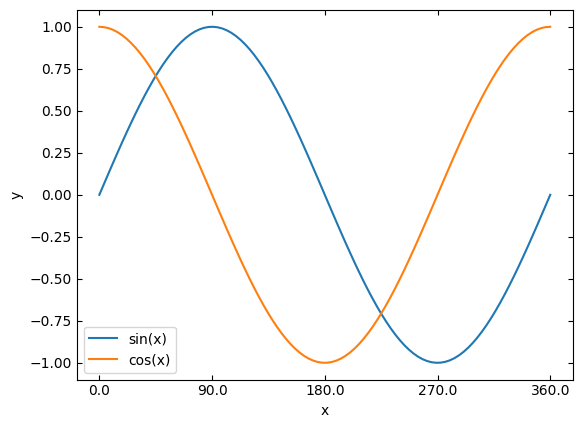

In [13]:
# refined example with a few tick parameters
plt.figure()
plt.plot(X, np.sin(X))
plt.plot(X, np.cos(X))
plt.xlabel("x")
plt.ylabel("y")

plt.xticks(ticks=np.arange(0, 370/rad_deg, 90/rad_deg))
# tick parameters
plt.tick_params(axis="both", direction="in", right=True, top=True)

plt.gca().xaxis.set_major_formatter(formatter)
plt.legend(['sin(x)', 'cos(x)'])
plt.show()

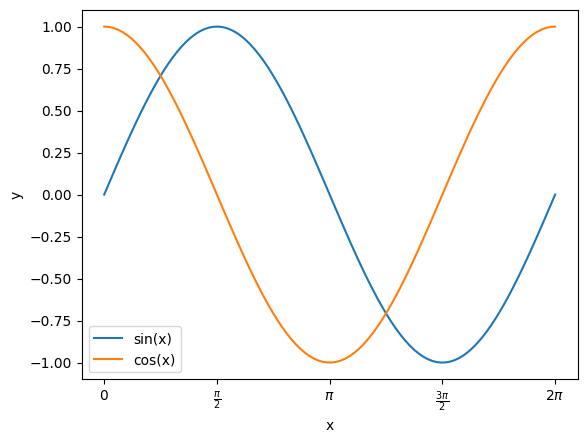

In [14]:
# one step further: custom xticks as 0, pi/2, pi, 3pi/2, 2pi in math notation using LaTeX
xticks_labels=[r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]

plt.figure()
plt.plot(X, np.sin(X))
plt.plot(X, np.cos(X))
plt.xlabel("x")
plt.ylabel("y")

# add custom labels
plt.xticks(ticks=np.arange(0, 370/rad_deg, 90/rad_deg),
          labels=xticks_labels)
# we don't need the formatter any more, since we already provided custom labels
# plt.gca().xaxis.set_major_formatter(formatter)
plt.legend(['sin(x)', 'cos(x)'])
plt.show()

Same plot using the OO interface:

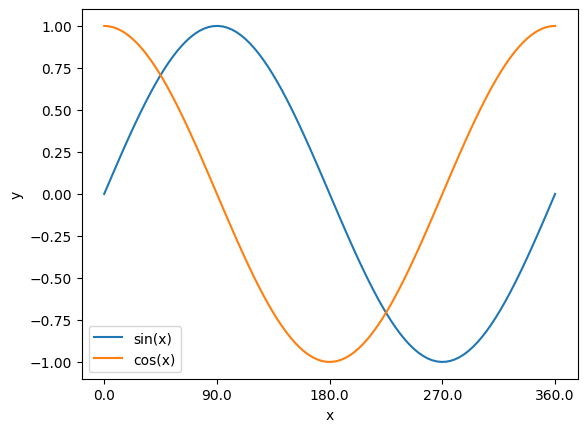

In [15]:
# version 1: x ticks labels set through FuncFormatter
fig, ax = plt.subplots()
ax.plot(X, np.sin(X), X, np.cos(X))
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_xticks(ticks=np.arange(0, 370/rad_deg, 90/rad_deg))
ax.xaxis.set_major_formatter(formatter)
ax.legend(['sin(x)', 'cos(x)'])
plt.show()

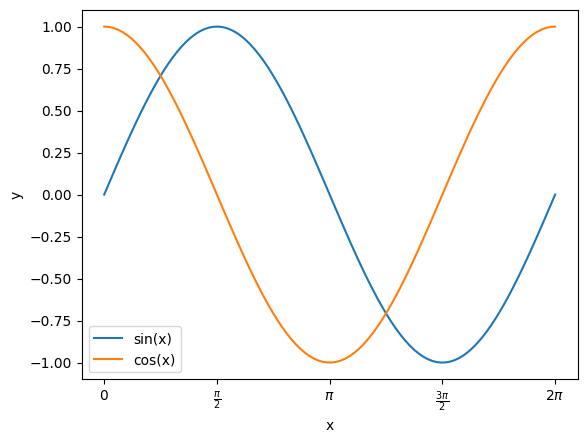

In [16]:
# version 2: x ticks labels set manually; improved legend management
fig, ax = plt.subplots()
ax.plot(X, np.sin(X), label="sin(x)")
ax.plot(X, np.cos(X), label="cos(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_xticks(ticks=np.arange(0, 370/rad_deg, 90/rad_deg),
          labels=xticks_labels)
ax.legend()
plt.show()

# How to Customise the Legend


The most common way to make a legend is to define the label parameter for each of the plots and finally call `plt.legend()` or `ax.legend()`.

Alternatively, you may also use the following syntax:

`plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))`

where `lineX` is a plot item you want to draw the legend for.

Let's clarify this modifying the code of the previous plot:

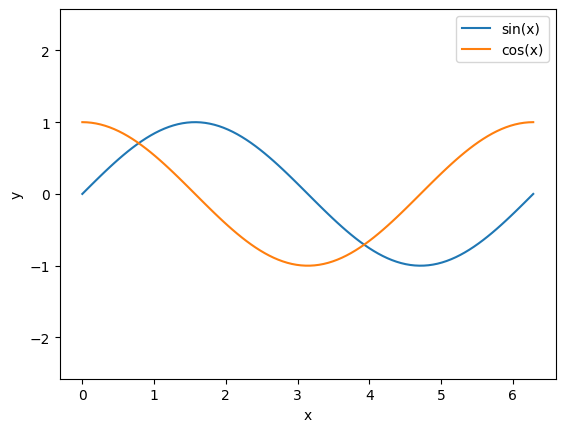

In [17]:
plt.figure()
sine = plt.plot(X, np.sin(X))
cosine = plt.plot(X, np.cos(X))

plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal") # set equal axis aspect ratio
plt.legend([sine[0], cosine[0]], ['sin(x)', 'cos(x)'])

plt.show()

You can pass further arguments to `plt.legend()` or `ax.legend` in order to customize aesthetics, such as legend border, layout, title, transparency.

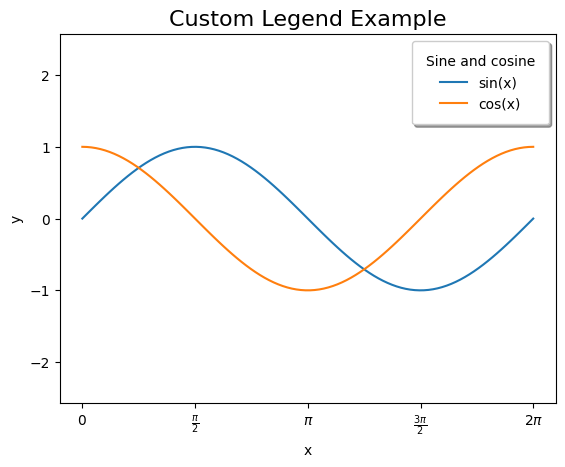

In [18]:
# legend customization
plt.figure()

plt.plot(X, np.sin(X), label="sin(x)")
plt.plot(X, np.cos(X), label="cos(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Custom Legend Example", fontsize=16)
plt.axis("equal")
# custom ticks
plt.xticks(ticks=np.arange(0, 370/rad_deg, 90/rad_deg), labels=xticks_labels)

# Modify legend
plt.legend(title="Sine and cosine", 
           frameon=True,  # legend border
           framealpha=1,  # transparency of border
           ncol=1,  # num columns
           shadow=True,  # shadow on
           borderpad=1,  # thickness of border
)

plt.show()


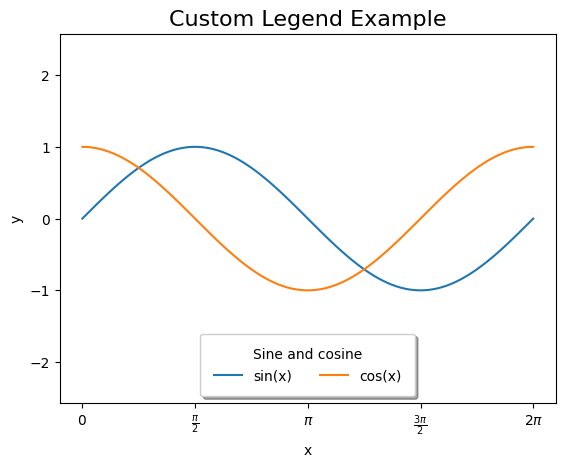

In [19]:
# legend customization (OO interface)
fig, ax = plt.subplots()

ax.plot(X, np.sin(X), label="sin(x)")
ax.plot(X, np.cos(X), label="cos(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Custom Legend Example", fontsize=16)
ax.axis("equal")
# custom ticks
ax.set_xticks(ticks=np.arange(0, 370/rad_deg, 90/rad_deg), labels=xticks_labels)

# Modify legend
ax.legend(title="Sine and cosine",
          loc="lower center", # "upper left"
          frameon=True,  # legend border
          framealpha=1,  # transparency of border
          ncol=2,  # num columns
          shadow=True,  # shadow on
          borderpad=1,  # thickness of border
)

plt.show()

# How to Add Texts, Arrows and Annotations

`plt.text` and `plt.annotate` add texts and annotations, respectively. If you have to plot multiple texts you need to call `plt.text()` many times, typically in a for-loop.

Let's annotate the peaks and troughs of a sine function by adding arrows (`arrowprops`) and a bounding box (`bbox`) for the text.

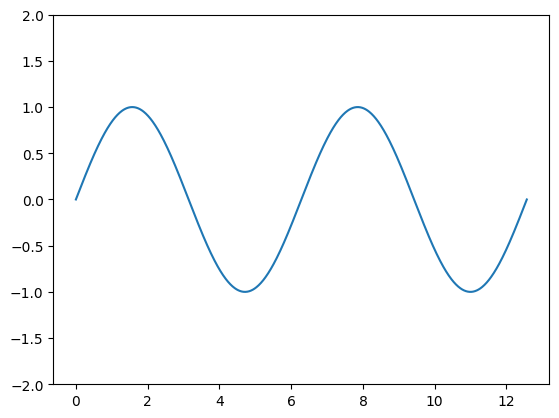

In [20]:
plt.figure()
X = np.linspace(0, 4*np.pi, 1000)
sine = plt.plot(X, np.sin(X), color='tab:blue')

plt.gca().set(ylim=(-2.0, 2.0))
plt.show()

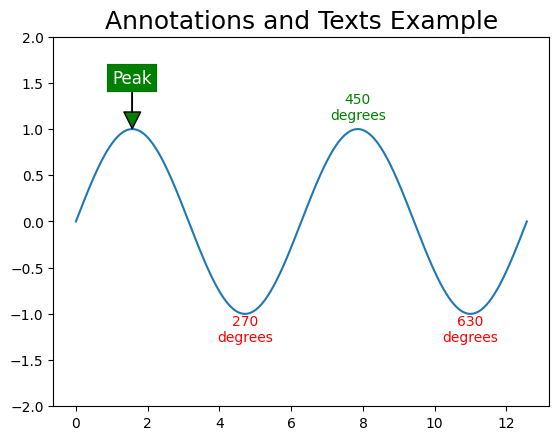

In [21]:
plt.figure()
X = np.linspace(0, 4*np.pi, 1000)
sine = plt.plot(X, np.sin(X), color='tab:blue')
# 1. Annotate the 1st peak with and arrow and a bounding box around the text
plt.annotate('Peak', 
             xy=(90/rad_deg, 1.0), 
             xytext=(90/rad_deg, 1.5),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='green', shrink=0.01, width=0.1), 
             fontsize=12, 
             color='white', 
             horizontalalignment='center')

# 2. Texts at subsequent Peaks and Troughs
angle = 90 + 360
plt.text(angle/rad_deg, 
         1.1, 
         str(angle) + "\ndegrees", 
         transform=plt.gca().transData, 
         horizontalalignment='center', 
         color='green')

for angle in [270, 630]: # programmatically: for angle in [270 + 360*i for i in range(2)]:
    plt.text(angle/rad_deg, 
             -1.3, 
             str(angle) + "\ndegrees",
             transform=plt.gca().transData, 
             horizontalalignment='center', 
             color='red')

plt.gca().set(ylim=(-2.0, 2.0))
plt.title('Annotations and Texts Example', fontsize=18)
plt.show()

Notice, **all the text we plotted above was in relation to the data**: `transform=plt.gca().transData`.

That is, the x and y position in the `plt.text()` corresponds to the values along the x and y axes. 

However, sometimes you might work with data of different scales on different subplots and you want to write the texts in the same position on all the subplots.

In such case, you can specify for `transform` the **x and y values in relation to the axes or the figure** (instead of x and y axis values):

- `plt.gca().transAxes` (or `ax.transAxes` in the OO syntax)
- `plt.gcf().transFigure` (or `fig.transFigure` in the OO syntax)

In this context, the lower left corner of the axes has (x, y) = (0, 0) and the top right corner will correspond to (1, 1).

The plot below shows the position of texts for the same values of (x, y) = (0.50, 0.02) with respect to the `Data(transData)`, `Axes(transAxes)` and `Figure(transFigure)` respectively.

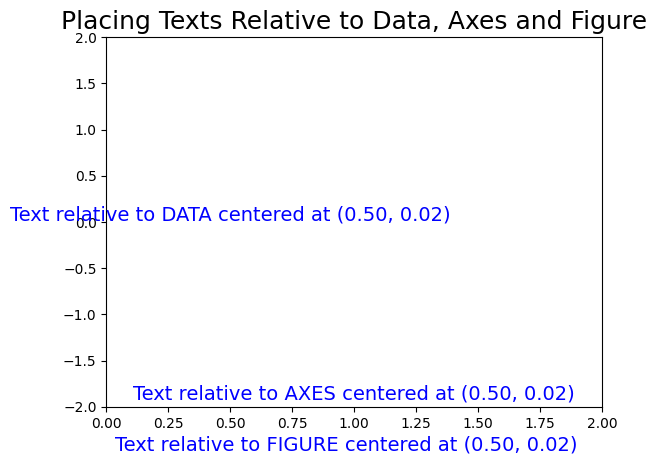

In [22]:
# Texts, Arrows and Annotations Example
plt.figure()

# Text Relative to DATA
plt.text(0.50, 0.02, "Text relative to DATA centered at (0.50, 0.02)", 
         transform=plt.gca().transData, 
         fontsize=14, 
         ha='center', 
         color='blue')

# Text Relative to AXES
plt.text(0.50, 0.02, "Text relative to AXES centered at (0.50, 0.02)", 
         transform=plt.gca().transAxes, 
         fontsize=14, 
         ha='center', 
         color='blue')

# Text Relative to FIGURE
plt.text(0.50, 0.02, "Text relative to FIGURE centered at (0.50, 0.02)", 
         transform=plt.gcf().transFigure, 
         fontsize=14, 
         ha='center',
         color='blue')

plt.gca().set(ylim=(-2.0, 2.0), xlim=(0, 2))
plt.title('Placing Texts Relative to Data, Axes and Figure', 
          fontsize=18)
plt.show()

In the following we recreate the same examples with the OO syntax: notice how the changes are minimal.

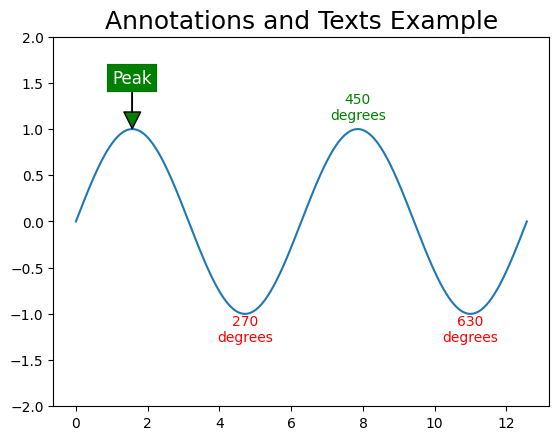

In [23]:
fig, ax = plt.subplots()
X = np.linspace(0, 4*np.pi, 1000)
ax.plot(X, np.sin(X), color='tab:blue')

# 1. Annotate the 1st peak with and arrow and a bounding box around the text
ax.annotate('Peak', xy=(90/rad_deg, 1.0), xytext=(90/rad_deg, 1.5),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='green', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')

# 2. Texts at subsequent Peaks and Troughs
angle = 90 + 360
ax.text(angle/rad_deg, 1.1, str(angle) + "\ndegrees", transform=ax.transData, 
         horizontalalignment='center', color='green')

for angle in [270, 630]: # programmatically: for angle in [270 + 360*i for i in range(2)]:
    ax.text(angle/rad_deg, -1.3, str(angle) + "\ndegrees", transform=ax.transData, 
             horizontalalignment='center', color='red')

ax.set_ylim(-2.0, 2.0)
ax.set_title('Annotations and Texts Example', fontsize=18)
plt.show()

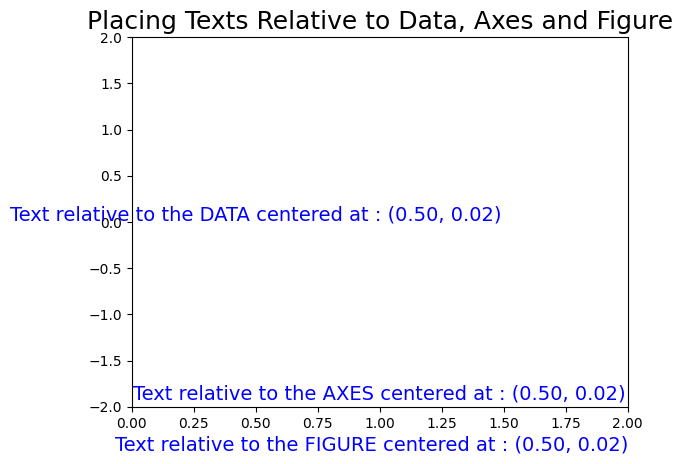

In [24]:
# Texts, Arrows and Annotations Example
fig, ax = plt.subplots()

# Text Relative to DATA
ax.text(0.50, 0.02, "Text relative to the DATA centered at : (0.50, 0.02)", 
        transform=ax.transData, 
        fontsize=14, ha='center', color='blue')

# Text Relative to AXES
ax.text(0.50, 0.02, "Text relative to the AXES centered at : (0.50, 0.02)", 
        transform=ax.transAxes, 
        fontsize=14, ha='center', color='blue')

# Text Relative to FIGURE
ax.text(0.50, 0.02, "Text relative to the FIGURE centered at : (0.50, 0.02)", 
        transform=fig.transFigure, 
        fontsize=14, ha='center', color='blue')

ax.set(ylim=(-2.0, 2.0), xlim=(0, 2))
ax.set_title('Placing Texts Relative to Data, Axes and Figure', fontsize=18)
plt.show()

# How to customize subplots layout

Matplotlib provides two convenient ways to create customized multi-subplots layouts:

* `plt.subplot2grid`
* `plt.GridSpec`

## subplot2grid

`plt.subplot2grid(shape=(n1, n2), loc=(i1, i2), rowspan=R, colspan=C)`

- n1, n2: number of rows/columns of the grid in which to place axis
- i1, i2: row and column index (0-based!) of the axis location within the grid
- R: number of rows for the axis to span downwards
- C: number of columns for the axis to span to the right.

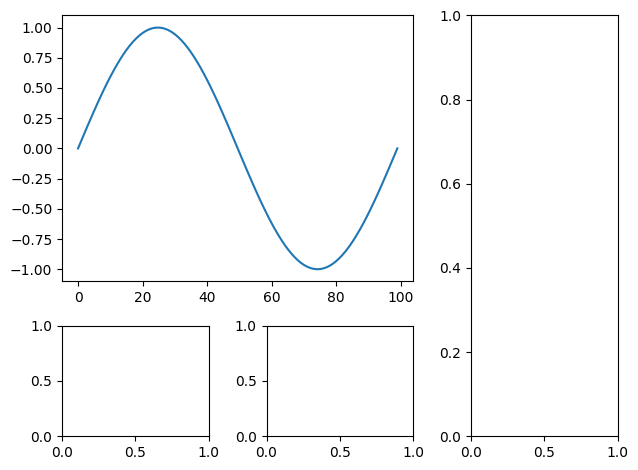

In [25]:
X = np.linspace(0, 2*np.pi, 100)
# Subplot2grid approach
fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=2, colspan=2) # topleft
ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)            # right
ax4 = plt.subplot2grid((3, 3), (2, 0))                       # bottom left
ax5 = plt.subplot2grid((3, 3), (2, 1))                       # bottom right
ax1.plot(np.sin(X))
fig.tight_layout()

## GridSpec

### Approach 1

1. You first create a grid object specifying the number of rows/columns with `grid = GridSpec(nrow, ncol)`.
2. Then you add subplots with subsequent calls to `plt.subplot(grid[idx1, idx2])`, where `idx1` and `idx2` specify their location within the grid, and how much they should span.

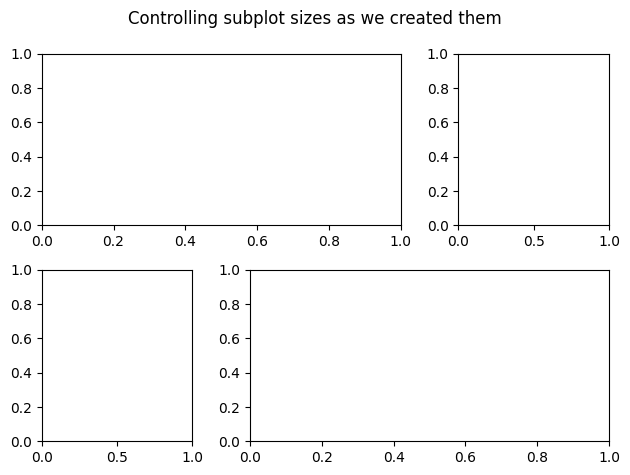

In [26]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
grid = plt.GridSpec(2, 3)  # 2 rows 3 cols
plt.subplot(grid[0, :2])  # top left
plt.subplot(grid[0, 2])  # top right
plt.subplot(grid[1, :1])  # bottom left
plt.subplot(grid[1, 1:])  # bottom right
plt.suptitle("Controlling subplot sizes as we created them")
fig.tight_layout()
plt.show()

### Approach 2

1. You first create an *iterable* grid object specifying the number of rows/columns *and their relative heights/widths*: `grid = GridSpec(nrow, ncol, height_ratios, width_ratios)`.
2. Then you iterate over the grid and add subplots to the i-th element of grid: `ax = fig.add_subplot(g)`.

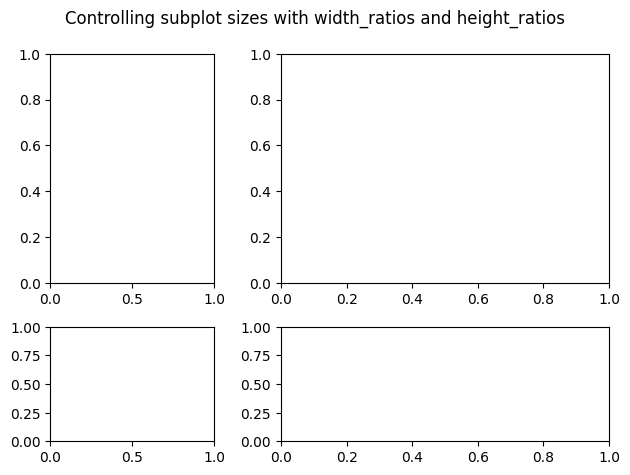

In [27]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[2, 1])

for g in gs:
    ax = fig.add_subplot(g)

fig.suptitle("Controlling subplot sizes with width_ratios and height_ratios")
fig.tight_layout()
plt.show()

### Marginal histograms & boxplots

A common application of subplot grids is to create scatterplots with marginal histograms or boxplots.

## Manual subplots

The above examples showed layouts where the subplots don't overlap. It is however possible to make subplots to overlap. 

In fact you can draw an axes inside a larger axes using `fig.add_axes()`. You need to specify the (x, y) positions *relative to the figure* and also the width and height of the inner plot.

Below is an example of an inner plot that zooms in to a larger plot.

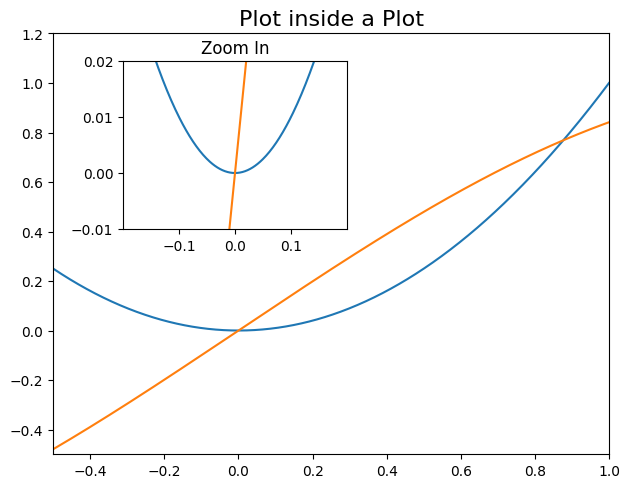

In [28]:
# Plot inside a plot
fig, ax = plt.subplots()
x = np.linspace(-0.50, 1., 1000)

# Outer Plot
ax.plot(x, x**2)
ax.plot(x, np.sin(x))
ax.set(xlim=(-0.5, 1.0), ylim=(-0.5, 1.2))
fig.tight_layout()

# Inner Plot
inner_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # x, y, width, height
inner_ax.plot(x, x**2)
inner_ax.plot(x, np.sin(x))
inner_ax.set(title='Zoom In', xlim=(-.2, .2), ylim=(-.01, .02), 
             yticks = [-0.01, 0, 0.01, 0.02], xticks=[-0.1, 0, .1])
ax.set_title("Plot inside a Plot", fontsize=16)
plt.show()

# How to draw Histograms, Boxplots and Bar plots

## Histograms


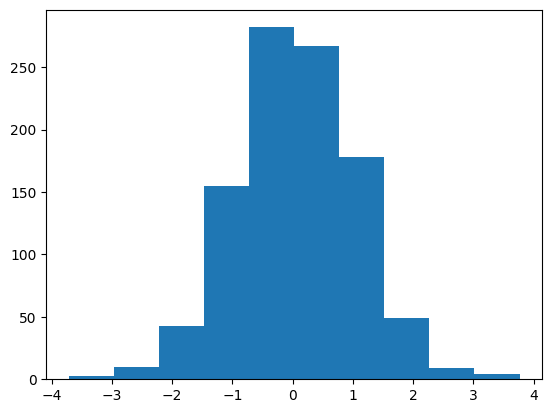

In [29]:
np.random.seed(99)
data = np.random.randn(1000)

plt.figure()
plt.hist(data)
plt.show()

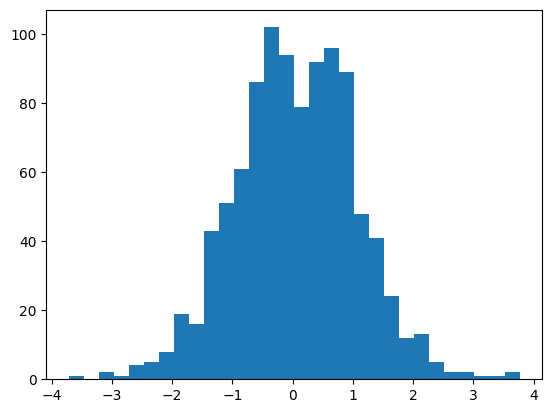

In [30]:
plt.hist(data, bins=30)
plt.show()

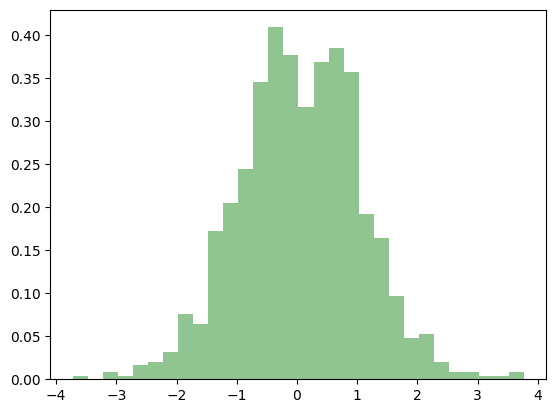

In [31]:
plt.hist(data, bins=30, density=True, alpha=0.5, color="forestgreen", edgecolor="none")
plt.show()

Here is an alternative and more compact way to set parameters: put them into a dictionary, then pass the dictionary as keyword arguments to the plotting function, using the unpacking operator `**`:

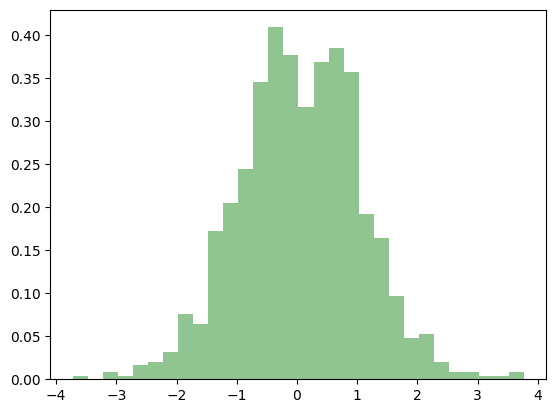

In [32]:
params = dict(bins=30, density=True, alpha=0.5, color="forestgreen", edgecolor="none")
plt.hist(data, **params) # note the use of the unpacking operator **
plt.show()

This is especially convenient when you have to use the same set of parameters in multiple function calls:

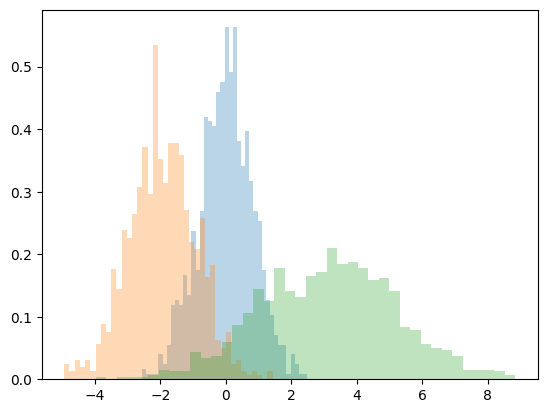

In [33]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

params = dict(alpha=0.3, density=True, bins=40)

plt.hist(x1, **params)
plt.hist(x2, **params)
plt.hist(x3, **params)

plt.show()

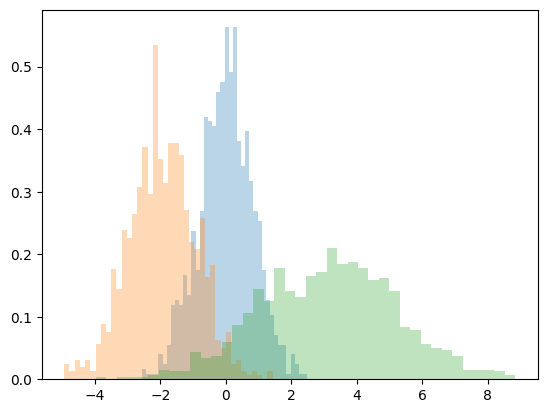

In [34]:
# OO version:
fig, ax = plt.subplots()

ax.hist(x1, **params)
ax.hist(x2, **params)
ax.hist(x3, **params)

plt.show()

`plt.hist()` automatically computes the count data and the bin edges: you can get this kind of information by capturing the output of the function `np.histogram()`, which is used under the hood.

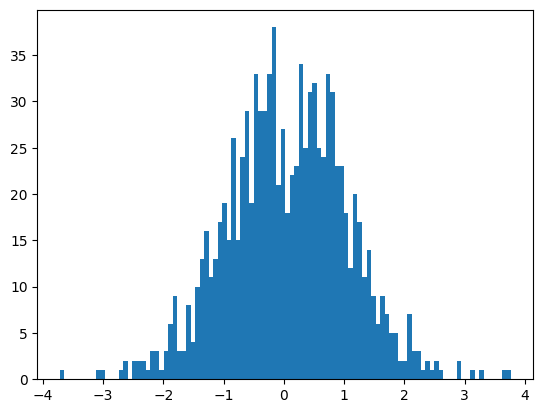

In [35]:
plt.figure()
plt.hist(data, bins=100)
plt.show()

In [36]:
counts, bin_edges = np.histogram(data, bins=20)
print(counts)
print(bin_edges)

[  1   2   3   7  16  27  63  92 134 148 122 145 107  71  32  17   7   2
   2   2]
[-3.71802061 -3.34374504 -2.96946946 -2.59519389 -2.22091831 -1.84664274
 -1.47236716 -1.09809158 -0.72381601 -0.34954043  0.02473514  0.39901072
  0.77328629  1.14756187  1.52183745  1.89611302  2.2703886   2.64466417
  3.01893975  3.39321532  3.7674909 ]


When 2 continuous variables are involved, you can create a 2D histogram (`plt.hist2d`) or a hexbin plot (`plt.hexbin`).

In [37]:
np.random.seed(99)

mean = [0, 0]
cov = [[1, 1], [1, 2]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

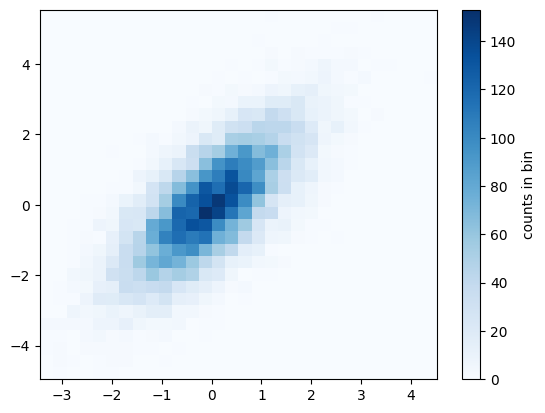

In [38]:
plt.figure()
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.show()

To get the computed counts and x-y bin edges:

In [39]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

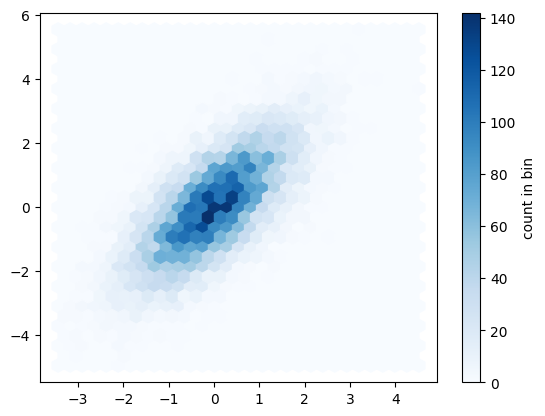

In [40]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## Boxplots

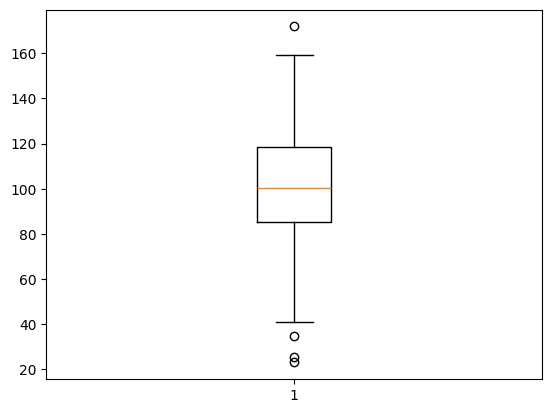

In [41]:
np.random.seed(99)
x = np.random.normal(100, 25, 200)

plt.figure()
plt.boxplot(x)
plt.show()

/tmp/ipykernel_6504/140795000.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x, labels=['a', 'b', 'c', 'd'])


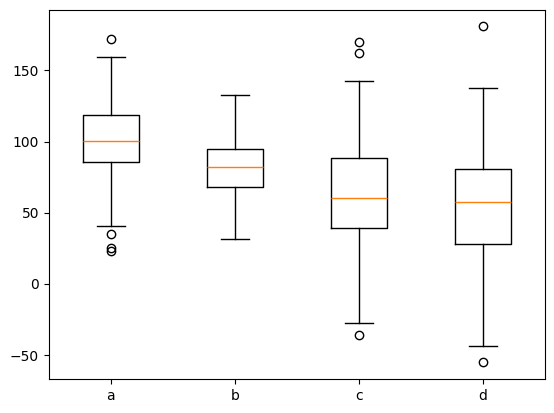

In [42]:
np.random.seed(99)

x1 = np.random.normal(100, 25, 200)
x2 = np.random.normal(80, 20, 200)  
x3 = np.random.normal(60, 35, 220)  
x4 = np.random.normal(50, 40, 200)

x = [x1, x2, x3, x4]

plt.figure()
plt.boxplot(x, labels=['a', 'b', 'c', 'd'])
plt.show()

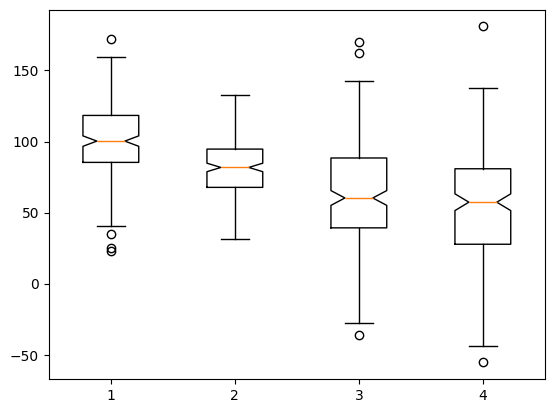

In [43]:
fig, ax = plt.subplots()
ax.boxplot(x, notch=True, vert=0)
plt.show()

/tmp/ipykernel_6504/2045705636.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(x, patch_artist=True, labels='abcd')


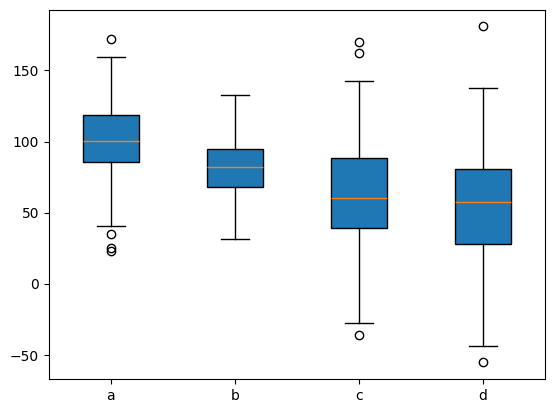

In [44]:
fig, ax = plt.subplots()
ax.boxplot(x, patch_artist=True, labels='abcd')
plt.show()

/tmp/ipykernel_6504/3434323842.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(x, patch_artist=True, labels='abcd',


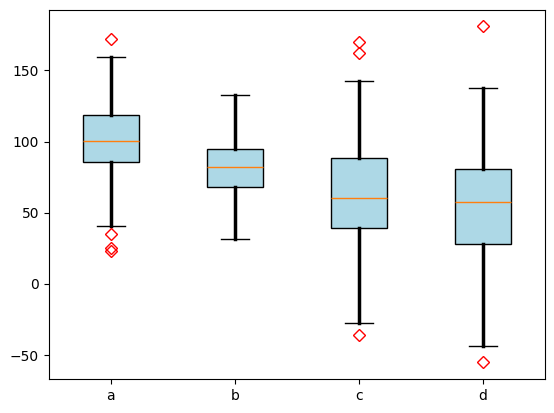

In [45]:
fig, ax = plt.subplots()
ax.boxplot(x, patch_artist=True, labels='abcd',
           boxprops={'facecolor': 'lightblue'},
           whiskerprops={'linewidth': 2.5},
           flierprops={'marker': 'D', 'markeredgecolor': 'red'},
          )
plt.show()

/tmp/ipykernel_6504/2153253253.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(x, patch_artist=True, labels='abcd') # patch_artist=True required to change box color


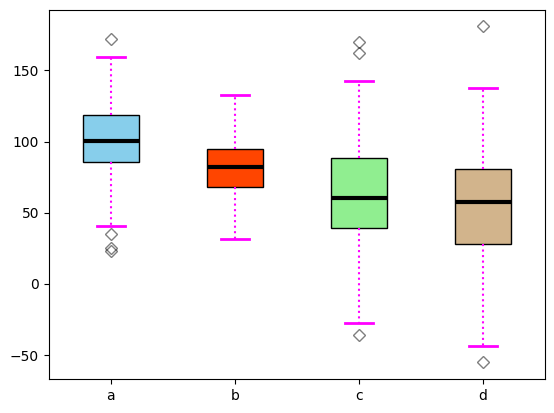

In [46]:
fig, ax = plt.subplots()

bp = ax.boxplot(x, patch_artist=True, labels='abcd') # patch_artist=True required to change box color
colors = ['skyblue', 'orangered', 'lightgreen', 'tan']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']: 
    whisker.set(color='magenta', linewidth=1.5, linestyle=":") 

for cap in bp['caps']:
    cap.set(color='magenta', linewidth=2) 

for median in bp['medians']: 
    median.set(color='black', linewidth=3) 

# changing style of outliers (fliers)
for flier in bp['fliers']: 
    flier.set(marker='D', alpha=0.5) 
      
plt.show()

## Violin plots

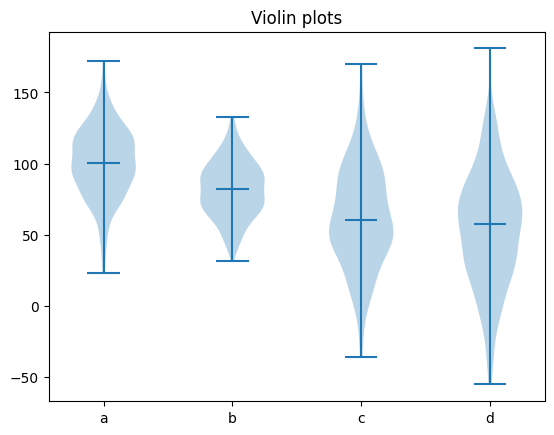

In [47]:
fig, ax = plt.subplots()

ax.violinplot(x, showmeans=False, showmedians=True)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['a', 'b', 'c', 'd'])
ax.set_title("Violin plots")

plt.show()

## Bar plots

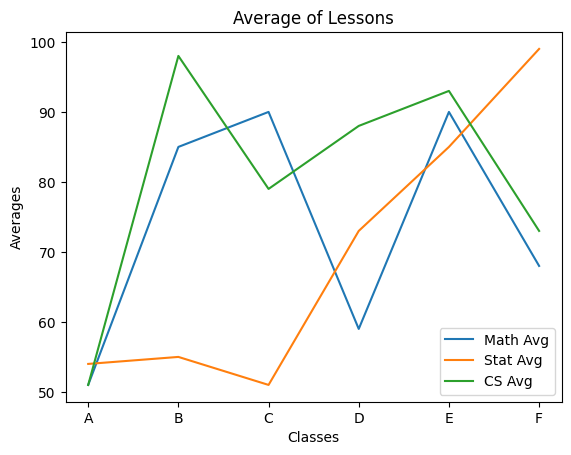

In [48]:
# generate simulated grades for five classes
np.random.seed(99)

Math = np.random.randint(50, 100, 6)
Stat = np.random.randint(50, 100, 6)
CS = np.random.randint(50, 100, 6)
classes = list('ABCDEF')

# line plot
plt.figure()
plt.plot(classes, Math, label="Math Avg")
plt.plot(classes, Stat, label="Stat Avg")
plt.plot(classes, CS, label="CS Avg")
plt.legend()
plt.title("Average of Lessons")
plt.xlabel("Classes")
plt.ylabel("Averages")
plt.show()

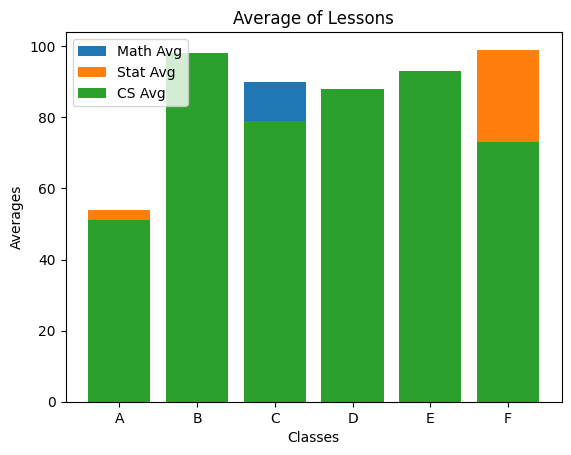

In [49]:
# bar plot
plt.figure()
plt.bar(classes, Math, label="Math Avg")
plt.bar(classes, Stat, label="Stat Avg")
plt.bar(classes, CS, label="CS Avg")
plt.legend()
plt.title("Average of Lessons")
plt.xlabel("Classes")
plt.ylabel("Averages")
plt.show()

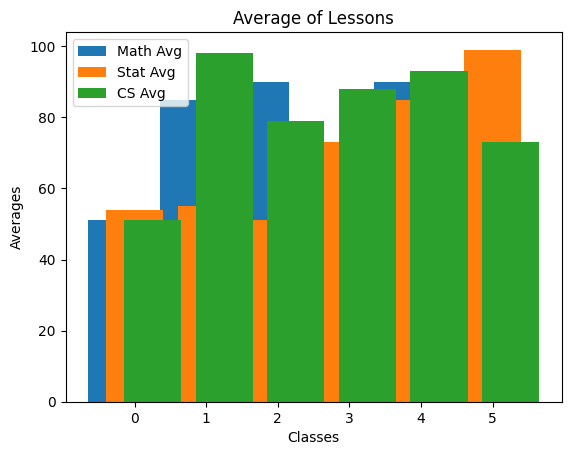

In [50]:
x_idx = np.arange(len(classes))
delta = 0.25

plt.bar(x_idx - delta, Math, label="Math Avg")
plt.bar(x_idx, Stat, label="Stat Avg")
plt.bar(x_idx + delta, CS, label="CS Avg")
plt.legend()
plt.title("Average of Lessons")
plt.xlabel("Classes")
plt.ylabel("Averages")
plt.show()

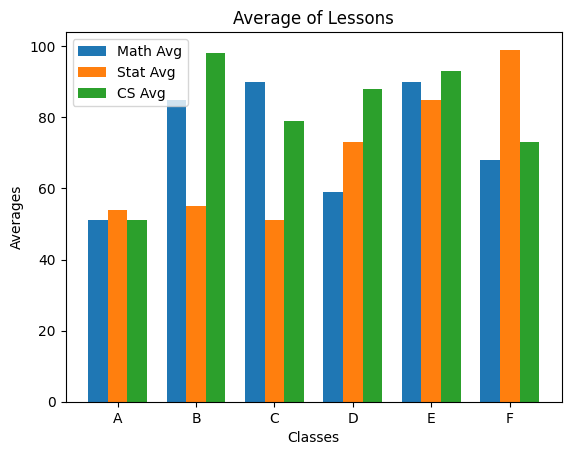

In [51]:
plt.bar(x_idx - delta, Math, width=delta, label="Math Avg")
plt.bar(x_idx, Stat, width=delta, label="Stat Avg")
plt.bar(x_idx + delta, CS, width=delta, label="CS Avg")
plt.legend()
plt.title("Average of Lessons")
plt.xlabel("Classes")
plt.ylabel("Averages")
plt.xticks(ticks=x_idx, labels=classes)
plt.show()

# Visualizing errors
## Basic error bars

<ErrorbarContainer object of 3 artists>

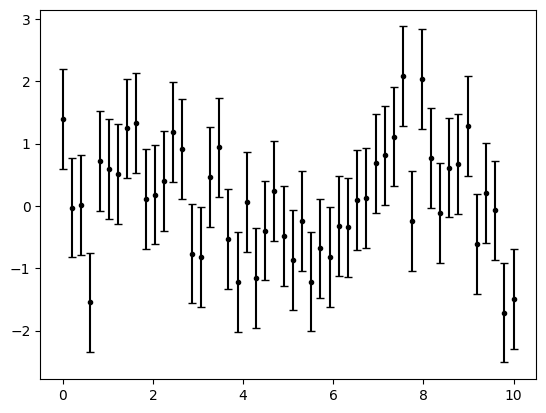

In [52]:
np.random.seed(11)

x = np.linspace(0, 10, 50)
dy = 0.8

y = np.sin(x) + dy*np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt=".k", capsize=3)

The string `fmt` controls how lines and points look like: it has same format as that used in `plt.plot` (so a combination of `[marker][line][color]`).

Further customizations are possible to fine-tune the color (`ecolor`), line width (`elinewidth`), and cap size (`capsize`) of the errorbars.

<ErrorbarContainer object of 3 artists>

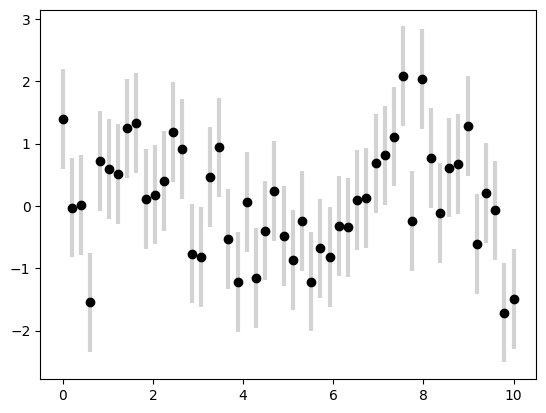

In [53]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
            ecolor="lightgray", elinewidth=3, capsize=0)

## Bar plot with error bars

In [54]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']

iris =  pd.read_csv(csv_url, names = col_names)
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
iris_data = iris.loc[:, 'Sepal_Length':'Petal_Width']
var_names = iris_data.columns.values

mean = np.mean(iris_data.values, axis=0)
sd = np.std(iris_data.values, axis=0)

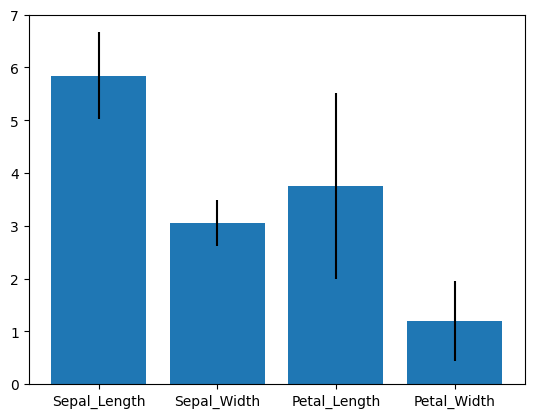

In [56]:
x_pos = range(4)

plt.figure()
plt.bar(x_pos, mean, yerr=sd, align="center")
plt.xticks(ticks=x_pos, labels=var_names)
plt.show()

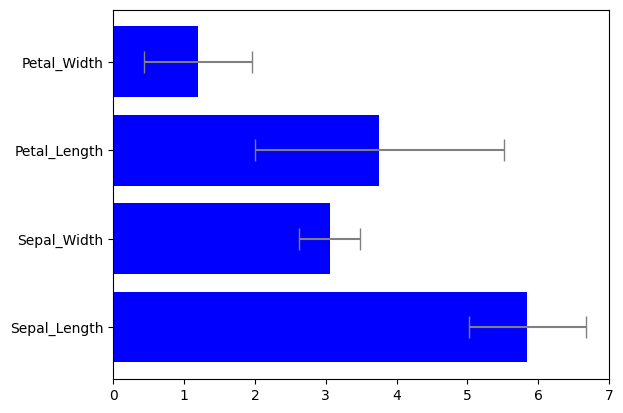

In [57]:
plt.figure()
plt.barh(x_pos, mean, xerr=sd, align="center", 
         color="blue", 
         ecolor="gray", 
         capsize=8)
plt.yticks(ticks=x_pos, labels=var_names)
plt.show()

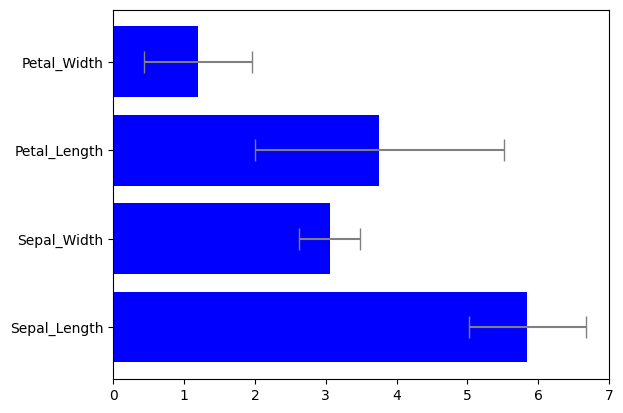

In [58]:
# OO version
fig, ax = plt.subplots()
ax.barh(x_pos, mean, xerr=sd, align="center", 
        color="blue", 
        ecolor="gray", 
        capsize=8)
ax.set_yticks(x_pos)
ax.set_yticklabels(var_names)
plt.show()

## Continuous errors

A typical application is to plot the standard error or the confidence interval associated to a model's prediction.

As a case study, let's perform a simple linear regression estimate.

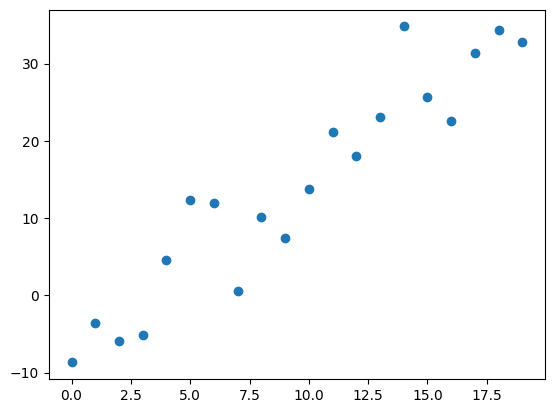

In [59]:
np.random.seed(1010)
x = np.arange(20)
dx = 2
y = 2*(x + dx*np.random.randn(20)) - 4

plt.scatter(x, y)

In [60]:
# fit a linear regression model
model = np.polyfit(x, y, deg=1)

a, b = model # get the model's coefficients
y_hat = a*x + b

The 95% confidence interval estimate for the model output, given a particular value of $x$, is

$$ \pm t_{crit} s_e \sqrt{1/n + \frac{(x - \bar{x})^2}{\sum(x-\bar{x})^2}} $$

where $t_{crit}$ is the critical value of a Student's t distribution at $1-0.05/2$:

In [62]:
from scipy import stats
n = len(x)
t_crit = stats.t.ppf(1 - 0.05/2, n-2) # n-2 degrees of freedom (the model has 2 params)
t_crit

np.float64(2.10092204024096)

$s_e$ is the standard error of the estimate:

$$ s_e = \sqrt{ \frac{\sum(y - \hat{y})^2}{n-2} } $$

In [63]:
se = np.sqrt(sum((y-y_hat)**2) / (n-2))

So the confidence interval is:

In [64]:
ci = t_crit * se * np.sqrt(1/n + (x - x.mean())**2 / np.sum((x - x.mean())**2))
ci

array([4.38076564, 4.04895333, 3.72930633, 3.42523219, 3.14125652,
       2.8833239 , 2.65902389, 2.47750813, 2.34871714, 2.28159704,
       2.28159704, 2.34871714, 2.47750813, 2.65902389, 2.8833239 ,
       3.14125652, 3.42523219, 3.72930633, 4.04895333, 4.38076564])

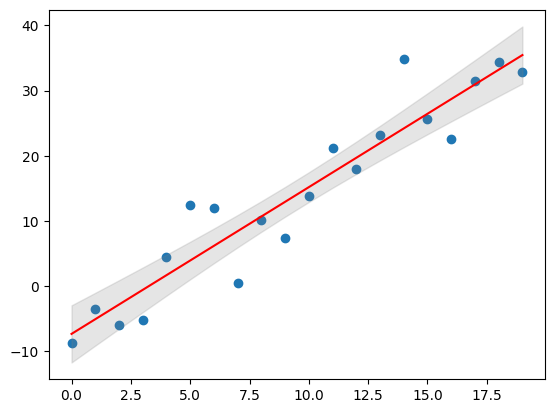

In [65]:
plt.scatter(x, y)
plt.plot(x, y_hat, '-r')
plt.fill_between(x, y_hat - ci, y_hat + ci, alpha=0.2, color="gray")
plt.show()

# Recap exercise

Using the Iris data and matplotlib:

1. Create a scatterplot of Petal length vs. Petal width, adding marginal histograms. Color the scatterplot by Iris species. Add axis labels and a title for the entire figure. (Optional: also color histograms by species)

2. Create a multipanel figure with 3 different visualizations as subplots (e.g., a scatterplot with linear regression line, a histogram, a boxplot, ...).

This is NOT to be considered as a nice solution because of small disalignments from the bars and data points axis.
A proper solution would be to use seaborn, a python module based on matplotli to visualize data, more informations in the next lab lessons (a small introduction at the end of lesson 6).

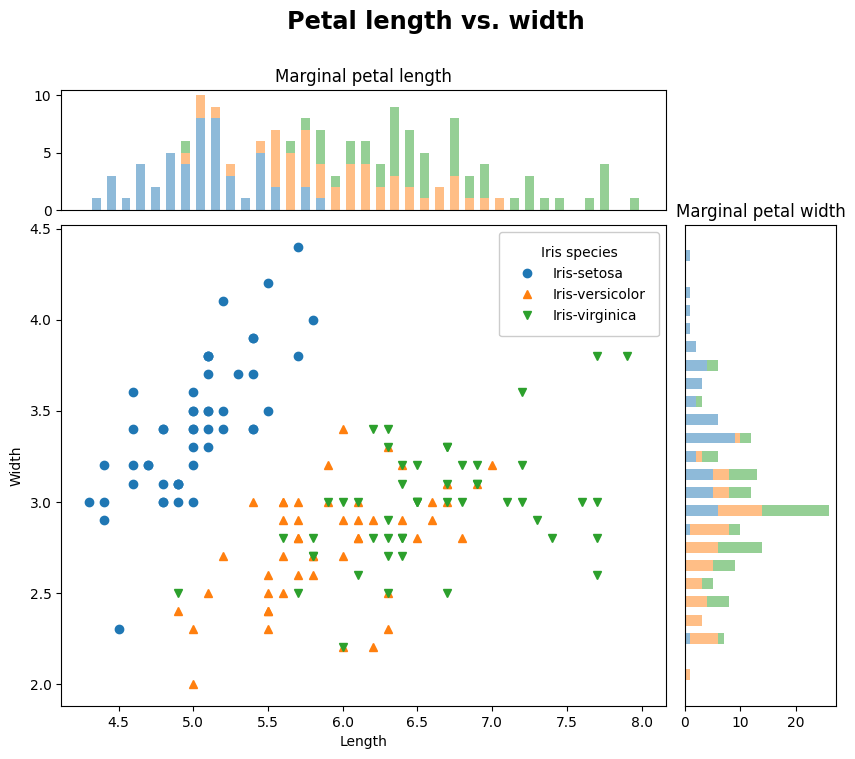

In [66]:
# point 1
# a better solution would be to use seaborn which automatically generates such plot
# but for the seek of the lab, i prefered to try doing on my own even if the final result
# is not completely correct (the bars are not correctly alligned with the corresponding dots)
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']

iris =  pd.read_csv(csv_url, names = col_names)

# scatter plot petal length v petal width

# group by species 
iris_grouped = iris.groupby(["Species"])
species_lists = []
for _, group in iris_grouped:
    species_lists.append(group)

# for each species, use a different symbol
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4],
                       wspace=0.05, hspace=0.05)

# Create axes
ax_histx = plt.subplot(gs[0, 0])  # top histogram
ax_histy = plt.subplot(gs[1, 1])  # right histogram
ax_scatter = plt.subplot(gs[1, 0], sharex=ax_histx, sharey=ax_histy)  # main scatter

symbols = ['o', '^', 'v']

for i in range(len(species_lists)):
    ax_scatter.plot(species_lists[i]['Sepal_Length'], species_lists[i]['Sepal_Width'], symbols[i], label=species_lists[i]['Species'].iloc[0])

ax_scatter.set_xlabel("Length")
ax_scatter.set_ylabel("Width")

# compute the correct bin size for the histogram by taking the range of value
# and dividing equally each unit by 10 as the measures are done to the first decimal value
min_value = iris['Sepal_Length'].min()
max_value = iris['Sepal_Length'].max()
bins = np.arange(min_value, np.ceil(max_value) + 0.1, 0.1)

data = []
for i in range(len(species_lists)):
    data.append(species_lists[i]['Sepal_Length'])

ax_histx.hist(data, alpha=.5, rwidth=.6, bins=bins, histtype='bar', stacked=True)
ax_histx.tick_params(axis='x', bottom=False, labelbottom=False)
ax_histx.set_title("Marginal petal length")

# compute the correct bin size for the histogram by taking the range of value
# and dividing equally each unit by 10 as the measures are done to the first decimal value
min_value = iris['Sepal_Width'].min()
max_value = iris['Sepal_Width'].max()
bins = np.arange(min_value, max_value, 0.1)
data = []

for i in range(len(species_lists)):
    data.append(species_lists[i]['Sepal_Width'])

ax_histy.hist(data, alpha=.5, rwidth=.6, orientation='horizontal', bins=bins, histtype='bar', stacked=True)
ax_histy.tick_params(axis='y', left=False, labelleft=False)
ax_histy.set_title("Marginal petal width")

plt.legend(
    title="Iris species",
    loc="upper right", 
    ncols=1,
    frameon=True,
    framealpha=1,
    borderpad=1,
)

fig.suptitle("Petal length vs. width", 
             fontsize='xx-large',
             fontweight='bold'
)

plt.show()

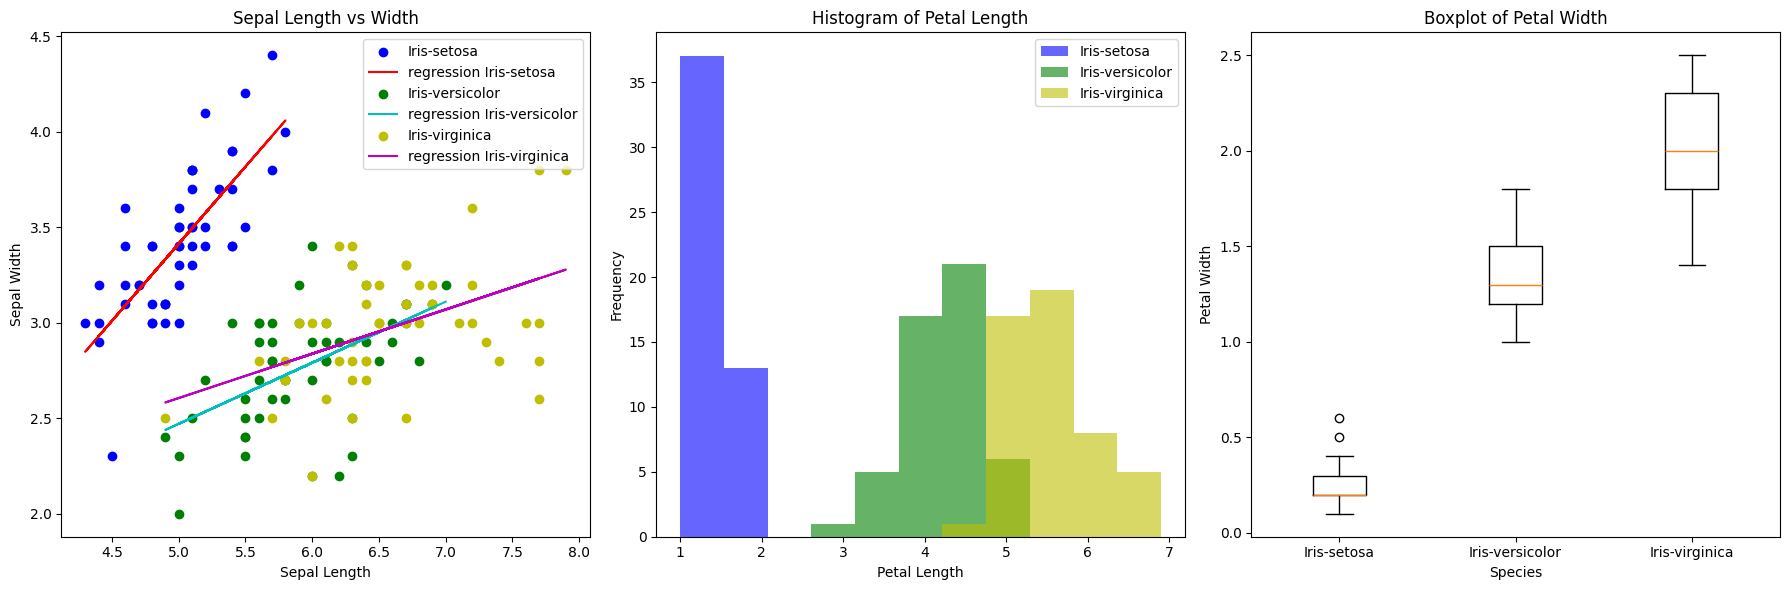

In [67]:
# load dataset
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

iris =  pd.read_csv(csv_url, names = col_names)

# group by species
iris_grouped = iris.groupby(["species"])
species_lists = []
for _, group in iris_grouped:
    species_lists.append(group)


# create 3 panel figure (all in 1 row)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

scatter_color = ['b', 'g', 'y']
regression_color = ['r', 'c', 'm']

# scatterplot with linear regression
for i, df in enumerate(species_lists):
    x = df['sepal_length']
    y = df['sepal_width']
    model = np.polyfit(x, y, deg=1)
    a, b = model
    y_hat = a * x + b

    axes[0].scatter(x, y, color=scatter_color[i], label=df['species'].iloc[0])
    axes[0].plot(x, y_hat, color=regression_color[i], label=f"regression {df['species'].iloc[0]}")

axes[0].set_title("Sepal Length vs Width")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")
axes[0].legend()

# histogram of petal length
bins = np.linspace(iris['petal_length'].min(), iris['petal_length'].max(), 12)
for i, df in enumerate(species_lists):
    axes[1].hist(df['petal_length'], bins=bins, alpha=0.6, label=df['species'].iloc[0], color=scatter_color[i])

axes[1].set_title("Histogram of Petal Length")
axes[1].set_xlabel("Petal Length")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# boxplot of petal width
box_data = [df['petal_width'] for df in species_lists]
axes[2].boxplot(box_data, tick_labels=[df['species'].iloc[0] for df in species_lists])

axes[2].set_title("Boxplot of Petal Width")
axes[2].set_xlabel("Species")
axes[2].set_ylabel("Petal Width")


plt.tight_layout()
plt.show()


# Credits

Partially abridged from matplotlib.org, Machine Learning Plus, J.R. Johansson (CC-BY 3.0).